# Optimization Review

Notebook for the Public Finance course at UCSC, by Duccio Gamannossi degl' Innocenti. You can find more information on the course on my [UCSC page](http://www.dgdi.me/#teaching) and on my [personal page](http://www.dgdi.me/#teaching).

## 1. Introduction

Economists usually assume that individuals seek to maximize their utility by making optimal choices given the constraints they face (e.g., individual's budget to be allocated between different goods, hours in a day to be devoted to work or leisure, etc.). 
This notebook provides a brief illustration of some methods to be used to solve the optimization problems considered during the Public Finance course.

(Note that these methods, while working in the simple setting considered in the course, might be unable to deliver results in particular cases.)


## 2. Uncostrained Optimization

In this course, only well-behaved utility function will be considered. We are generally speaking about a function $u$ that in the univariate case is twice differentiable with $u''<0$.

In this simple setting, if a well-behaved objective function has an interior optimum, it will be at a point where its first derivative relative to the variable of choice is equal to $0$. 

This follows from:
  * A derivative equal to zero identifies a point where the slope changes of sign. 
  * Given that $u''<0$ the sign can only change from positive to negative
  * A maximum is reached when $u'$ switches sign from positive to negative. 
  
      Starting from a point where $u'(\underline{x})>0$ (the utility increases when its argument raises) subsequent increases in $x$ deliver diminishing marginal increases in $u$ (due to $u''<0$). For a given $x^*>\underline{x}$ it will be that $u'(x^*)=0$ (an increase in $x$ will deliver no increase in utility) so that for any higher value of the argument $\bar{x}>x^*$ utility will get lower by increasing $x$ (given that $u'(\bar{x})<0$). Hence, $x^*$ is a maximum. 
      
      Given that the derivative represents the slope of the curve of the function with respect to the variable of choice, we can give a simple graphical representation of this behaviour (see below). Drawing the function $u$ on the $y$ axis versus the $x$, it is that when $u'(\underline{x})>0$ the curve goes up from left to right until $u'(x^*)=0$ where it stops increasing. For any point at the right of $x^*$ the curve of $u$ is downward sloping.    
      
  
In order to solve an unconstrained optimization problem:
 1. Define the function to be maximized
 2. Evaluate the $FOC$, i.e., the derivative of the function with respect to the choice variable
 3. Set $FOC=0$ and solve for the choice variable

#### A simple unconstrained utility maximization problem

We want to find the optimal consumption of coffe for a student at UCSC. As we know, the coffe price is $p=.6$ euro. We are considering a particular student who feels awful before her first coffe in the morning, enjoys less and less every additional coffe and starts shaking due to caffeine when taking more than five in a day. Then, we could model her utility from coffee as $U(z)=5z - z^2$. The problem of our student is then to maximize her objective function $F(z,p) = 5z - z^2 - zp$ where $z$ is the amount of coffe consumed.

The first step in the analysis is to define:

In [1]:
#define utility function
U_simple(z) = 5*z-z^2
#display utility function
U_simple(z)

-z^2 + 5*z

We can improve how the output of the code is printed by asking for its latex form (using the function `latex()`) and then displying it using the `html()` function

In [2]:
html(latex(U_simple(z)))

<script type="math/tex">-z^{2} + 5 \, z</script>

Let's say that we want to add at the beginning of the output the name of the expression we are displaying. We can combine [latex math text](https://www.overleaf.com/learn/latex/Mathematical_expressions)  with math expressions using `+`.

In [3]:
html("U(z)=" + latex(U_simple(z)))

<script type="math/tex">U(z)= -z^{2} + 5 \, z</script>

In a similar fashion we can write the objective function

In [4]:
#define objective function
F(z, p) = U_simple(z) - (z*p)
#display objective function
html("F(z,p)=" + latex(F(z, p)))

<script type="math/tex">F(z,p)= -p z - z^{2} + 5 \, z</script>

We might want to explore the problem visually, so to have a better idea about it. 

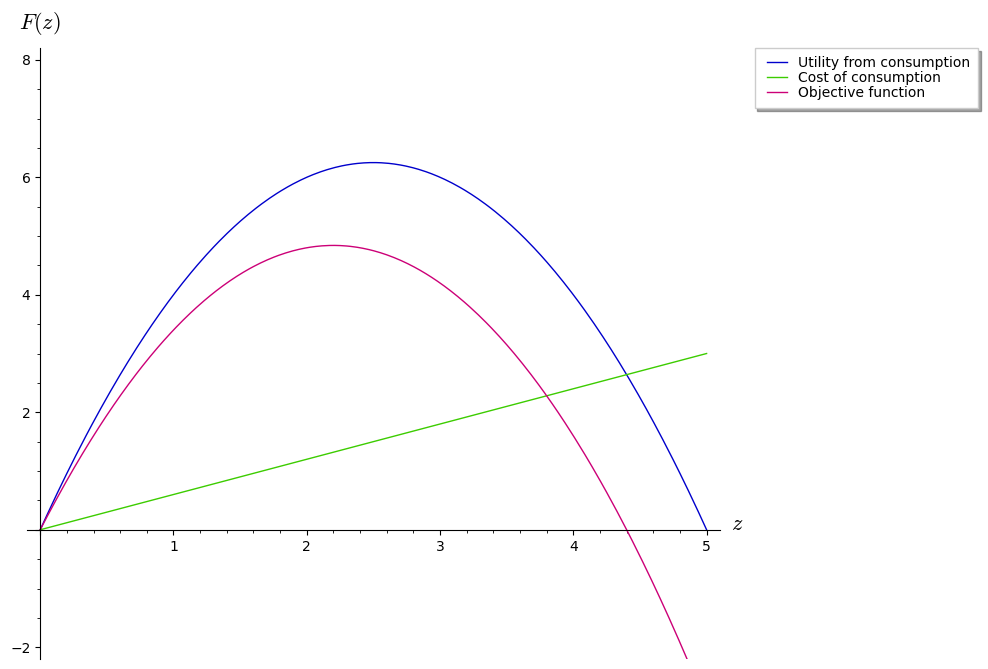

In [5]:
#define price parameter
p=.6
#define min and max quantities of coffe
zmin = 0 
zmax = 5
#plot of the utility function, cost function and objective function vs the coffee quantity consumed
plot_simple = plot([U_simple(z), p*z, F(z,p)], (z, zmin, zmax), 
                   axes_labels = ['$z$','$F(z)$'], 
                   legend_label = ["Utility from consumption", 
                                   "Cost of consumption", 
                                   "Objective function"])
#set legend so to not overlap with the plot
plot_simple.set_legend_options(handlelength=2, borderaxespad = 0, 
                             labelspacing =.05, bbox_to_anchor=(1.05, 1), 
                             loc=2)
#show plot
show(plot_simple, ymin = -2, ymax = 8, figsize = 10)
    

From the graph we can see that the optimal quantity of good, $z^*$ is around $2$. As we previously stated, the maximum will be at the point where the slope of the Objective function is equal to zero. 

In [6]:
#set the interact environment to create interactive graphs
@interact
#creates a slider between 0 and 5 with step =.1 to be used to modify interactively the quantity
def tangent_line(z0 = slider(0, 5, .1, default = 1)):
    
    #finds the derivative of the objective function relative to the quantity (slope of objective function)
    df(z) = diff(F(z, p=.6), z)
    #creates a line with slope equal to the objective function and that is tangent to it at z0
    tanf(z) = F(z=z0, p =.6) + df(z=z0)*(z-z0)
    #plot of the utility function, cost function and objective function and the tangent line vs the coffee quantity consumed
    plot_simple_tan = plot([U_simple(z), p*z, F(z,p), tanf(z)], zmin, zmax, axes_labels=['$z$','$Variable$'], legend_label = ["Utility from consumption", 
                                                                                      "Cost of consumption", 
                                                                                      "Objective function",
                                                                                      "Slope of Objective function"])
    #set legend so to not overlap with the plot
    plot_simple_tan.set_legend_options(handlelength=2, borderaxespad = 0, 
                             labelspacing =.05, bbox_to_anchor=(1.05, 1), 
                             loc=2)
    #show plot
    show(plot_simple_tan, ymin = -2, ymax = 10, figsize = 10)
    
   

Interactive function <function tangent_line at 0x6ffdad78e170> with 1 widget
  z0: TransformFloatSlider(value=…

We can then compute the $FOC$, equate it to zero and solve for $z$ to identify precisely the optimal quantity.

In [7]:
#compute FOC
FOC_simple = diff(F(z, p), z)
#equates FOC to zero and solves for optimal z
z_star = solve(FOC_simple == 0, z)[0]
#display optimal z
html(latex(z_star))

<script type="math/tex">z = \left(\frac{11}{5}\right)</script>

So it is $z^*=\frac{11}{5}=2.2$. So it seems that our student of interest will usually get a couple coffe, which sounds about right. We already know from the plot that the $FOC$ is identifying a maximum, but we can express it more concisely by reporting the $SOC$:

In [8]:
#compute SOC
SOC = diff(F(z, p), z, z)
#display SOC
html("SOC=" + latex(SOC) + "<0")

<script type="math/tex">SOC= -2 <0</script>

During the course we will generally assume interior so you will not need to worry about second order conditions

## 3. Constrained Optimization
In this course we will only deal with choices over two goods at most. The general form of these constrained optimization problem is:

$$ max_{x,z}U(x,z)\mbox{  } s.t.\mbox{  } w=p_xx+p_zz $$

That we can define in SageMath as:

In [9]:
#Defines the variables x and z that we will be using in the functions 
var('x, z')
#Defines 'general' function (the argument is not specified
U = function('U');
#display function U while defining it as a function of x and z
html("U="+latex(U(x, z)))

<script type="math/tex">U= U\left(x, z\right)</script>

Here are presented three strategies to solve this problem:
 * A - Substitution
 * B - Lagrangean optimization
 * C - The Equimarginal principle   

#### A - Substitution

An optimization problem in two variables ${x, z}$ where the constraints define a relation between the two goods, can be restated as a single variable one by substitution. Indeed, once the quantity of the first good is chosen so it is the money left to be spent on the other. Chosing $x$ then implies a choice for $z$ and the two-variable maximization problem boils down to the optimal choice of just one of them.

Analytically, in order to characterize the solution to the problem using substitution:
   1. Use the constraints of the problem to identify the relationship between the two goods (that is, the budget constraint). Let's express $z$ as a function of $x$.
   2. Substitute $z$ in the  objective function (i.e. $U$) with the expression obtained in point 1 so to restate the problem as an unconstrained single-variable one  (the constraint is now embeeded into the objective function due to the substitution). 
   3. Solve the problem as an uncostrained maximization one by computing the $FOC=\frac{\partial U}{\partial x}$ and imposing $FOC=0$ . 

Algebraically, it is:
##### 1. Identify the relationship between the two goods

Define the second constraint

In [10]:
#defines the variables for price of good x, price of good z and wage 
var('p_x, p_z, w')
#defines the budget constraint (note that `=` assign a value while `==` stands for equality)
cnstr= w == p_x*x+p_z*z
#disply budget constraint
html(latex(cnstr))

<script type="math/tex">w = p_{x} x + p_{z} z</script>

Solve the constraint for $z$ 

In [11]:
z_cnstr = solve(cnstr, z)[0].rhs()
html("z_{cnstr}="+latex(z_cnstr))

<script type="math/tex">z_{cnstr}= -\frac{p_{x} x - w}{p_{z}}</script>

##### 2. Substitute $z_{cnstr}$ in the  objective function


In [12]:
#defines and display the function U_sub that is the univariate utility that only depends on good x 
#(since good z is expressed in terms of good x) 
function('U_sub');
U_sub(x) = U(x, z_cnstr)
html("U_{sub}="+latex(U_sub(x)))

<script type="math/tex">U_{sub}= U\left(x, -\frac{p_{x} x - w}{p_{z}}\right)</script>

##### 3. Solve the problem as an uncostrained maximization one

In [13]:
#compute and display the FOC as a function of just x
FOC_sub = diff(U_sub(x), x)
html("FOC_{sub}="+latex(FOC_sub) + "=0")

<script type="math/tex">FOC_{sub}= -\frac{p_{x} \mathrm{D}_{1}\left(U\right)\left(x, -\frac{p_{x} x - w}{p_{z}}\right)}{p_{z}} + \mathrm{D}_{0}\left(U\right)\left(x, -\frac{p_{x} x - w}{p_{z}}\right) =0</script>

Here, the notation $\mathrm{D}_n(U)$ stands for the derivative of the function $U$ relative to argument in the $nth$ position. We can get back to the usual (Leibniz) notation:

In [14]:
#tinkering with code to get to a more readable expression
pretty_FOC_sub = FOC_sub.substitute({FOC_sub.operands()[0]:-(p_x/p_z)*diff(U(x), x), FOC_sub.operands()[1]:diff(U(x), x)})
html("FOC_{sub}="+latex(pretty_FOC_sub) + "=0")

<script type="math/tex">FOC_{sub}= -\frac{p_{x} \frac{\partial}{\partial x}U\left(x\right)}{p_{z}} + \frac{\partial}{\partial x}U\left(x\right) =0</script>

That can be re-arranged as:

In [15]:
#defines the equation pretty_FOC_sub_eq by equating to zero pretty_FOC_sub
pretty_FOC_sub_eq = pretty_FOC_sub==0
#subtract the derivative of U divide by -p_x both sides 
#(exactly as you would do with pen and paper)
pretty_FOC_sub_eq = pretty_FOC_sub_eq.subtract_from_both_sides(diff(U(x), x)).divide_both_sides(-p_x)
#display FOC
html("FOC_{sub}="+latex(pretty_FOC_sub_eq))

<script type="math/tex">FOC_{sub}= \frac{\frac{\partial}{\partial x}U\left(x\right)}{p_{z}} = \frac{\frac{\partial}{\partial x}U\left(x\right)}{p_{x}}</script>

So, the solution of this problems will be such that
 1. The optimal quantity of good $z$ consumed will be $z^*= \frac{p_xx−w}{pz}$ to satisfy the budget constraint
 2. The optimal quantities of goods consumed ${x^*, z^*}$ needs to satisfy the condition $FOC_{sub}$
 
 We will get back to the interpretation of the second point soon.

#### B - Lagrangean Optimization

An alternative method for optimization is the Lagrangean method. This technique allows to embed the budget constraint in the maximization and is particularly useful with choices involving more than two goods. 

Analytically, in order to characterize the solution to the problem using the Lagrangean method:
   1. Collect the terms of the budget constraint on one side - we will refer to this expression as $BC_{collect}$.
   2. Define the *Lagrangean Function* $\mathcal{L}$ by adding $BC_{collect}$ multiplied by the *lagrangean multiplier* $\lambda$ to the objective function of the problem 
  
  $$\mathcal{L}(x, z, \lambda) = U(x,z) + \lambda(w-p_xx-p_zz)$$
 
      Notice that, when the constraint is fulfilled and the individual uses his entire budget, the additional term becomes zero (including the multiplier $\lambda$). Furthermore, the additional term implies that, whenever the budget constraint is not binding, there is margin for an improvement of the objective function by reallocation. Crucially, adding the budget constraint to the objective function does not alter the problem at the optimum. So,  the combination of $x, z$ that maximizes $\mathcal{L}$ also maximizes $U$. To sum up, the addition of the constraint as in the $Lagrangean$ identifies a maximum that is both satisfying the constraint and that identifies a maximum for the underlying objective function $U$.     

   3. Evaluate the $FOCs$ of this new problem $\mathcal{L}(x, z, \lambda)$ (relative to the variables $x, z, \lambda$)  and solve the system $FOCs=0$ to characterize the solution.

##### 1. Use the constraints to restate the budget constraint

In [16]:
#collecting the terms of the budget constraint on one side
#by subtracting p_x*x+p_z*z from both sides 
BC_collect = cnstr.subtract_from_both_sides(p_x*x+p_z*z).lhs()
html("BC_{collect}=" + latex(BC_collect))

<script type="math/tex">BC_{collect}= -p_{x} x - p_{z} z + w</script>

##### 2. Define the *Lagrangean Function*  $\mathcal{L}$

In [17]:
#defines the variables l that will be the lagrangean multiplier
#we further specify that in the latex display it should be represented by the greek symbol lambda
#(note that the latex commands have a double \\ instead of a single one \)
var('l', latex_name='\\lambda')
#Defines the lagrangean function
L(x, z, l) = U(x, z) + l*(BC_collect)
html("\\mathcal{L}=" + latex(L(x, z, l)))

<script type="math/tex">\mathcal{L}= -{\left(p_{x} x + p_{z} z - w\right)} {\lambda} + U\left(x, z\right)</script>

##### 3. Evaluate the FOC 

In [18]:
#compute and display the lagrangean function derivatives with respect to x 
DLDx = diff(L(x, z, l), x)
html("\\frac{\\partial \\mathcal{L}}{\\partial x}=" + latex(DLDx) + "=0")

<script type="math/tex">\frac{\partial \mathcal{L}}{\partial x}= -{\lambda} p_{x} + \frac{\partial}{\partial x}U\left(x, z\right) =0</script>

In [19]:
#compute and display the lagrangean function derivatives with respect to z
DLDz = diff(L(x, z, l), z)
html("\\frac{\\partial \\mathcal{L}}{\\partial z}=" + latex(DLDz) + "=0")

<script type="math/tex">\frac{\partial \mathcal{L}}{\partial z}= -{\lambda} p_{z} + \frac{\partial}{\partial z}U\left(x, z\right) =0</script>

In [20]:
#compute and display the lagrangean function derivatives with respect to l 
DLDl = diff(L(x, z, l), l)
html("\\frac{\\partial \\mathcal{L}}{\\partial \\lambda}=" + latex(DLDl) + "=0")

<script type="math/tex">\frac{\partial \mathcal{L}}{\partial \lambda}= -p_{x} x - p_{z} z + w =0</script>

The system {$\frac{\partial \mathcal{L}}{\partial x}=0$, $\frac{\partial \mathcal{L}}{\partial z}=0$, $\frac{\partial \mathcal{L}}{\partial \lambda}=0$} provides a characterization of the solution.

In particular, $\frac{\partial \mathcal{L}}{\partial \lambda}=0$ implies a binding budged constraint. 
Moreover, by inspecting $\frac{\partial \mathcal{L}}{\partial x}=0$ and $\frac{\partial \mathcal{L}}{\partial z}=0$ we can see that :

Equation $\frac{\partial \mathcal{L}}{\partial x}=0$ can be solved for $\lambda$

In [21]:
#equates DLDx to 0 ed solves for lambda
l_DLDx = solve(DLDx==0, l)[0]
html(latex(l_DLDx))

<script type="math/tex">{\lambda} = \frac{\frac{\partial}{\partial x}U\left(x, z\right)}{p_{x}}</script>

similarly, for equation $\frac{\partial \mathcal{L}}{\partial z}=0$ it is

In [22]:
#equates DLDz to 0 ed solves for lambda
l_DLDz = solve(DLDz==0, l)[0]
html(latex(l_DLDz))

<script type="math/tex">{\lambda} = \frac{\frac{\partial}{\partial z}U\left(x, z\right)}{p_{z}}</script>

and, equating $\lambda$ we get:

In [23]:
#equates the right-hand-sides (using the function `rhs()` of l_DLDx to l_DLDz 
#to find the condition characterizing the optimum
html("FOC_{\\mathcal{L}_{2-3}=}" + latex(l_DLDx.rhs()) + "=" + latex(l_DLDz.rhs()))

<script type="math/tex">FOC_{\mathcal{L}_{2-3}=} \frac{\frac{\partial}{\partial x}U\left(x, z\right)}{p_{x}} = \frac{\frac{\partial}{\partial z}U\left(x, z\right)}{p_{z}}</script>

the same condition stated in $FOC_{sub}$. These conditions are particular case of:

#### C - The Equimarginal principle

The equimarginal principle states that maximization of a given objective function is attained when the allocation of resources among different alternatives is such that the utility derived from the last unit of money spent on each is equal. In our setting, the individual will maximize his objective function when the marginal utility per euro spent is the same across the goods he can buy. 

We can rewrite this condition as:

In [24]:
#equates the right-hand-sides of l_DLDx to l_DLDz to find the condition characterizing the optimum
EMP = l_DLDx.rhs() == l_DLDz.rhs()
#re-arrange the expression by dividing both sides by dUdz and multiplying by p_x
EMP = EMP.divide_both_sides(diff(U(x, z), z)).multiply_both_sides(p_x)
html("MRS_{xz}=" + latex(EMP))

<script type="math/tex">MRS_{xz}= \frac{\frac{\partial}{\partial x}U\left(x, z\right)}{\frac{\partial}{\partial z}U\left(x, z\right)} = \frac{p_{x}}{p_{z}}</script>

Where the left-hand-side is the marginal rate of substitution, the rate at which the consumer is willing to trade off between the two goods). This condition has a simple graphical interpretation: it identifies the solution as the point where the slope of the indifference curve $MRS_{xz}$ is the same of the slope of the budget constraint $p_x/p_z$.


### A video on the Lagangean Multiplier method

If you would like to have another explanation of the Lagrangean Multiplier method, have a look at  [this video](https://www.youtube.com/watch?v=RZz7c1oeHm4). 